In [1]:
import io
import json
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tqdm.notebook import tqdm

%matplotlib inline

In [2]:
def plain_text(target: str, show: bool) -> None:
    with open(target, "rb") as fp:
        obj = pickle.load(fp)
    if show:
        print(json.dumps(obj, indent=2))


def with_files(target: str, show: bool) -> None:
    with open(target, "rb") as fp:
        obj = pickle.load(fp)

    images = []
    for key, val in obj["files"].items():
        buff = io.BytesIO(val)
        _image = Image.open(buff)
        image = np.asarray(_image)
        images.append((f"{key}/{_image.format}", image))
        _image.close()
        buff.close()
    del obj["files"]

    if show:
        print(json.dumps(obj, indent=2))
        for title, image in images:
            plt.figure()
            plt.imshow(image)
            plt.title(title)

  0%|          | 0/816 [00:00<?, ?it/s]

---------------------------------------- navdp_step_xy_req ----------------------------------------
{
  "endpoint": "navdp_step_xy",
  "form": {
    "goal_data": "{\"goal_x\": [2.365032911300659], \"goal_y\": [-0.10905072093009949]}",
    "depth_time": "1762493199.2065392",
    "rgb_time": "1762493199.2065396"
  }
}
{
  "all_trajectory": [
    [
      [
        [
          0.16707547008991241,
          0.0031900645699352026,
          0.02849613130092621
        ],
        [
          0.3290385901927948,
          0.011510190553963184,
          0.026500988751649857
        ],
        [
          0.49324721097946167,
          0.017343848943710327,
          0.028158074244856834
        ],
        [
          0.6593877673149109,
          0.02234221063554287,
          0.03238224610686302
        ],
        [
          0.8266822099685669,
          0.02577710710465908,
          0.02546820230782032
        ],
        [
          0.9957081079483032,
          0.0263577401638031,
      

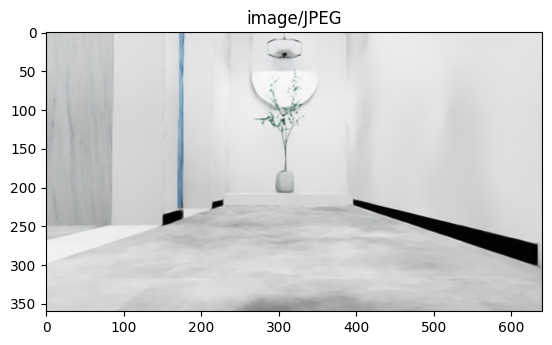

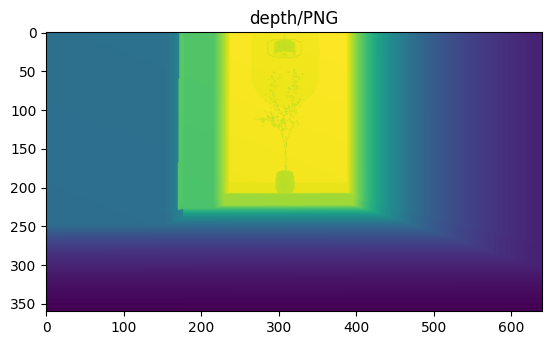

In [7]:
showed = set()
for root, _, fs in os.walk("./recording"):
    for f in tqdm(fs):
        stamp, name = f.split("_", maxsplit=1)
        if name == "resp":
            continue

        show = name not in showed
        showed.add(name)

        if show:
            print("-" * 40, name, "-" * 40)
        if "step" in name:
            with_files(os.path.join(root, f), show)
        else:
            plain_text(os.path.join(root, f), show)
        plain_text(os.path.join(root, f"{stamp}_resp"), show)